## Decision Trees

In [1]:
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
#import classification

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = tree.DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
export_graphviz(tree_clf, out_file="./iris_tree.dot", feature_names=iris.feature_names[2:],
                class_names=iris.target_names, rounded=True, filled=True)

In [5]:
def plot_decision_boundary(classifier, x, y,resolution=0.05):
    
    # only for two features possible
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max,resolution))
    xx = np.append(xx1.flatten()[:,np.newaxis],xx2.flatten()[:,np.newaxis],axis=1)
    yy = classifier.predict(xx).reshape(xx1.shape)
    
    # plot decision boundary
    plt.contourf(xx1, xx2, yy, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    unique_ = np.unique(y)
    for i in range(len(unique_)):
        xclass = x[np.where(y==unique_[i])]
        label = 'class '+str(i)
        plt.scatter(xclass[:,0],xclass[:,1],label=label) 
    plt.legend()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

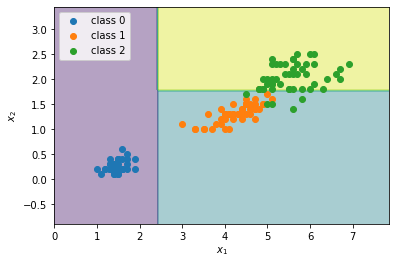

In [6]:
plot_decision_boundary(tree_clf, X, y,resolution=0.05)

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])